## Overview

#### Known issues

- Actual fiducial markers are rarely included in the raw images

- A definite position for fiducial marker proxys is hard to detect at a subpixel level of precision. The openCV template matching routine can be off by a few pixels, even when markers are not bent, missing, or otherwise obscured. 

- Evan manual selection of a fiducial marker proxy will include some error.

- Because we don't have the camera calibration report for the NAGAP used in 1977, we don't know the actual distance between fiducial markers. Thus we cannot confidently correct for distortions.

#### Correct for rotation and shear distortion

- Use openCV to detect fiducial marker proxy. 
- Compute the approximated principal point.
- Subtract/Add 1/2 distance between opposing fiducial marker proxys to determine target "true" points at left, top, right, and bottom positions.
- Transform the image using the transform between auto-detected points and the "true" points.

#### Correct for stretching
- Use averaged distance between fiducial marker proxy locations, after rotation/shear correction to make a final correction for stretching.

In [1]:
%load_ext autoreload
%autoreload 2

/Users/knuth/miniconda3/envs/hsfm/lib/python3.7/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
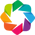

In [2]:
import hsfm
import os
import glob
import cv2
import pandas as pd
import numpy as np
from skimage import transform as tf
import matplotlib.pyplot as plt

In [3]:
camera_positions_file_name = 'input_data/targets.csv'
template_directory         = 'input_data/fiducials/notch'
output_directory           = 'input_data/images'

### Download raw images to disk

In [4]:
# hsfm.batch.download_images_to_disk(camera_positions_file_name, 
#                                    output_directory='input_data/images/raw',
#                                    image_type='pid_tiff')

### Auto detect fiducial marker coordinates

In [5]:
! ls input_data/fiducials/nagap/notch

B.jpg L.jpg R.jpg T.jpg


In [6]:
raw_images = sorted(glob.glob(os.path.join('input_data/images/raw','*tif')))

templates = hsfm.core.gather_templates('input_data/fiducials/nagap/notch') 

In [10]:
principal_points_list = []
intersection_angles_list = []
left_fiducials_list = []
top_fiducials_list = []
right_fiducials_list = []
bottom_fiducials_list = []

for image_file in raw_images:
    file_path, file_name, file_extension = hsfm.io.split_file(image_file)
    print('Processing',file_name)
    img_gray = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    
    half_image_height     = int(img_gray.shape[0] / 2)
    quarter_image_height  = int(half_image_height / 2)

    half_image_width     = int(img_gray.shape[1] / 2)
    quarter_image_width  = int(half_image_width / 2)
    
    window_left = [half_image_height - quarter_image_height,
                   half_image_height + quarter_image_height,
                   0, 
                   half_image_width - quarter_image_width]

    window_top = [0,
                  half_image_height - quarter_image_height,
                  half_image_width - quarter_image_width,
                  half_image_width + quarter_image_width]

    window_right = [half_image_height - quarter_image_height,
                    half_image_height + quarter_image_height,
                    half_image_width + quarter_image_width,
                    img_gray.shape[1]]


    window_bottom = [half_image_height + quarter_image_height,
                     img_gray.shape[0],
                     half_image_width - quarter_image_width,
                     half_image_width + quarter_image_width]
                     
    windows = [window_left, window_top, window_right, window_bottom]

    fiducials, principal_point = hsfm.core.detect_fiducials_and_principal_point(windows, 
                                                                                templates, 
                                                                                img_gray,
                                                                                invisible_fiducial=False)
    
    intersection_angle = hsfm.core.determine_intersection_angle(fiducials)
    
    principal_points_list.append(principal_point)
    intersection_angles_list.append(intersection_angle)
    left_fiducials_list.append(fiducials[0])
    top_fiducials_list.append(fiducials[1])
    right_fiducials_list.append(fiducials[2])
    bottom_fiducials_list.append(fiducials[3])
    

Processing NAGAP_77V6_062
Processing NAGAP_77V6_063
Processing NAGAP_77V6_064
Processing NAGAP_77V6_065
Processing NAGAP_77V6_066
Processing NAGAP_77V6_067
Processing NAGAP_77V6_068
Processing NAGAP_77V6_069


In [11]:
fiducial_metadata_tmp = {'raw_image': raw_images, 
                        'principal_point': principal_points_list,
                        'intersection_angle': intersection_angles_list, 
                        'left_fiducial': left_fiducials_list,
                        'top_fiducial': top_fiducials_list,
                        'right_fiducial': right_fiducials_list,
                        'bottom_fiducial': bottom_fiducials_list} 

df_tmp = pd.DataFrame(fiducial_metadata_tmp)
df_tmp.to_csv('input_data/fiducials_metadata.csv',index=False)

In [12]:
fiducial_metadata = pd.read_csv('input_data/fiducials_metadata.csv')

### Correct rotation and shear distortion

In [13]:
def get_distance(point1, point2):
    distance = np.sqrt((point1[0]-point2[0])**2+(point2[1]-point1[1])**2)
    return distance

def get_principal_point(fiducial_coordinates):
    fiducial_coordinates_x = fiducial_coordinates[:,0]
    fiducial_coordinates_y = fiducial_coordinates[:,1]

    principal_point_x = fiducial_coordinates_x.reshape(-1,2).mean(axis=0).mean()
    principal_point_y = fiducial_coordinates_y.reshape(-1,2).mean(axis=0).mean()
    
    principal_point = (principal_point_x, principal_point_y)
    return principal_point

def compute_true_position(principal_point, horizontal_distance, vertical_distance):
    
    left_fiducial_true = (principal_point[0]-horizontal_distance/2,principal_point[1])
    top_fiducial_true = (principal_point[0],principal_point[1]-vertical_distance/2)
    right_fiducial_true = (principal_point[0]+horizontal_distance/2,principal_point[1])
    bottom_fiducial_true = (principal_point[0],principal_point[1]+vertical_distance/2)
    
    fiducial_coordinates_true = np.array([left_fiducial_true, 
                                      top_fiducial_true, 
                                      right_fiducial_true, 
                                      bottom_fiducial_true], 
                                      dtype=float)
    
    return fiducial_coordinates_true

def determine_intersection_angle(fiducials):
    left_fiducial = fiducials[0]
    top_fiducial = fiducials[1]
    right_fiducial = fiducials[2]
    bottom_fiducial = fiducials[3]
            
    # QC routine
    arc1 = np.rad2deg(np.arctan2(bottom_fiducial[1] - top_fiducial[1],
                  bottom_fiducial[0] - top_fiducial[0]))
    arc2 = np.rad2deg(np.arctan2(right_fiducial[1] - left_fiducial[1],
                  right_fiducial[0] - left_fiducial[0]))
    intersection_angle = arc1-arc2
        
    return np.round(intersection_angle)

In [14]:
transformed_principal_points_list = []
transformed_intersection_angles_list = []
transformed_left_fiducials_list = []
transformed_top_fiducials_list = []
transformed_right_fiducials_list = []
transformed_bottom_fiducials_list = []


for index, row in fiducial_metadata.iterrows():
    
    principal_point = eval(row['principal_point'])

    left_fiducial = eval(row['left_fiducial'])
    top_fiducial = eval(row['top_fiducial'])
    right_fiducial = eval(row['right_fiducial'])
    bottom_fiducial = eval(row['bottom_fiducial'])
    
    fiducial_coordinates = np.array([left_fiducial, 
                                     top_fiducial, 
                                     right_fiducial, 
                                     bottom_fiducial], 
                                     dtype=float)

    horizontal_distance = get_distance(left_fiducial,right_fiducial)
    vertical_distance = get_distance(top_fiducial,bottom_fiducial)
    
    fiducial_coordinates_true = compute_true_position(principal_point, 
                                                      horizontal_distance, 
                                                      vertical_distance)
    
    tform = tf.AffineTransform()
    tform.estimate(fiducial_coordinates, fiducial_coordinates_true)
    
    fiducials_transformed = tform(fiducial_coordinates)
    principal_point_transformed = get_principal_point(fiducials_transformed)
    intersection_angle = determine_intersection_angle(fiducials_transformed)
    
    transformed_principal_points_list.append(principal_point_transformed)
    transformed_intersection_angles_list.append(intersection_angle)
    transformed_left_fiducials_list.append(tuple(fiducials_transformed[0]))
    transformed_top_fiducials_list.append(tuple(fiducials_transformed[1]))
    transformed_right_fiducials_list.append(tuple(fiducials_transformed[2]))
    transformed_bottom_fiducials_list.append(tuple(fiducials_transformed[3]))
    
    
    img_array = cv2.imread(row['raw_image'], cv2.IMREAD_GRAYSCALE)
    output_dim = img_array.shape
    warp_img = tf.warp(img_array, tform, output_shape=output_dim)
    warp_img = (warp_img*255).astype(np.uint8)
    
    path , basename, extension = hsfm.io.split_file(row['raw_image'])
    hsfm.io.create_dir('input_data/images/transformed')
    out = os.path.join('input_data/images/transformed',basename+extension)
    cv2.imwrite(out, warp_img)
    
fiducial_metadata['t_principal_point'] = transformed_principal_points_list
fiducial_metadata['t_intersection_angle'] = transformed_intersection_angles_list
fiducial_metadata['t_left_fiducial'] = transformed_left_fiducials_list
fiducial_metadata['t_top_fiducial'] = transformed_top_fiducials_list
fiducial_metadata['t_right_fiducial'] = transformed_right_fiducials_list
fiducial_metadata['t_bottom_fiducial'] = transformed_bottom_fiducials_list

fiducial_metadata.to_csv('input_data/fiducials_metadata.csv',index=False)

### Correct stretching distortion

In [15]:
transformed_images = sorted(glob.glob(os.path.join('input_data/images/transformed','*tif')))
fiducial_metadata = pd.read_csv('input_data/fiducials_metadata.csv')
fiducial_metadata['transformed_image'] = transformed_images

In [16]:
left_fiducial_x = []
left_fiducial_y = []

top_fiducial_x = []
top_fiducial_y = []

right_fiducial_x = []
right_fiducial_y = []

bottom_fiducial_x = []
bottom_fiducial_y = []


for index, row in fiducial_metadata.iterrows():

    left_fiducial = eval(row['t_left_fiducial'])
    top_fiducial = eval(row['t_top_fiducial'])
    right_fiducial = eval(row['t_right_fiducial'])
    bottom_fiducial = eval(row['t_bottom_fiducial'])
    
    left_fiducial_x.append(left_fiducial[0])
    left_fiducial_y.append(left_fiducial[1])
    
    top_fiducial_x.append(top_fiducial[0])
    top_fiducial_y.append(top_fiducial[1])
    
    right_fiducial_x.append(right_fiducial[0])
    right_fiducial_y.append(right_fiducial[1])
    
    bottom_fiducial_x.append(bottom_fiducial[0])
    bottom_fiducial_y.append(bottom_fiducial[1])

In [17]:
left_fiducial_x_mean = np.mean(left_fiducial_x)
left_fiducial_y_mean = np.mean(left_fiducial_y)

top_fiducial_x_mean = np.mean(top_fiducial_x)
top_fiducial_y_mean = np.mean(top_fiducial_y)

right_fiducial_x_mean = np.mean(right_fiducial_x)
right_fiducial_y_mean = np.mean(right_fiducial_y)

bottom_fiducial_x_mean = np.mean(bottom_fiducial_x)
bottom_fiducial_y_mean = np.mean(bottom_fiducial_y)

Use mean distance between fiducial markers.

In [18]:
horizontal_distance = get_distance((left_fiducial_x_mean,left_fiducial_y_mean),
                                   (right_fiducial_x_mean,right_fiducial_y_mean))

vertical_distance = get_distance((top_fiducial_x_mean,top_fiducial_y_mean),
                                 (bottom_fiducial_x_mean,bottom_fiducial_y_mean))


In [19]:
transformed_principal_points_list = []
transformed_intersection_angles_list = []
transformed_left_fiducials_list = []
transformed_top_fiducials_list = []
transformed_right_fiducials_list = []
transformed_bottom_fiducials_list = []


for index, row in fiducial_metadata.iterrows():
    
    principal_point = eval(row['t_principal_point'])
    
    left_fiducial = eval(row['t_left_fiducial'])
    top_fiducial = eval(row['t_top_fiducial'])
    right_fiducial = eval(row['t_right_fiducial'])
    bottom_fiducial = eval(row['t_bottom_fiducial'])
    
    fiducial_coordinates = np.array([left_fiducial, 
                                     top_fiducial, 
                                     right_fiducial, 
                                     bottom_fiducial], 
                                     dtype=float)
    
    fiducial_coordinates_true = compute_true_position(principal_point, 
                                                      horizontal_distance, 
                                                      vertical_distance)
    
    
    tform = tf.AffineTransform()
    tform.estimate(fiducial_coordinates, fiducial_coordinates_true)
    
    
    img_array = cv2.imread(row['transformed_image'], cv2.IMREAD_GRAYSCALE)
    output_dim = img_array.shape
    warp_img = tf.warp(img_array, tform, output_shape=output_dim)
    warp_img = (warp_img*255).astype(np.uint8)
    
    path , basename, extension = hsfm.io.split_file(row['transformed_image'])
    hsfm.io.create_dir('input_data/images/final_transformed')
    out = os.path.join('input_data/images/final_transformed',basename+extension)
    cv2.imwrite(out, warp_img)
    
    fiducials_transformed = tform(fiducial_coordinates)
    principal_point_transformed = get_principal_point(fiducials_transformed)
    intersection_angle = determine_intersection_angle(fiducials_transformed)
    
    transformed_principal_points_list.append(principal_point_transformed)
    transformed_intersection_angles_list.append(intersection_angle)
    transformed_left_fiducials_list.append(tuple(fiducials_transformed[0]))
    transformed_top_fiducials_list.append(tuple(fiducials_transformed[1]))
    transformed_right_fiducials_list.append(tuple(fiducials_transformed[2]))
    transformed_bottom_fiducials_list.append(tuple(fiducials_transformed[3]))
    
    

In [20]:
fiducial_metadata['t_final_principal_point'] = transformed_principal_points_list
fiducial_metadata['t_final_intersection_angle'] = transformed_intersection_angles_list
fiducial_metadata['t_final_left_fiducial'] = transformed_left_fiducials_list
fiducial_metadata['t_final_top_fiducial'] = transformed_top_fiducials_list
fiducial_metadata['t_final_right_fiducial'] = transformed_right_fiducials_list
fiducial_metadata['t_final_bottom_fiducial'] = transformed_bottom_fiducials_list

transformed_images = sorted(glob.glob(os.path.join('input_data/images/final_transformed','*tif')))
fiducial_metadata['final_transformed_image'] = transformed_images

fiducial_metadata.to_csv('input_data/fiducials_metadata.csv',index=False)

### Crop square centered on principal point

In [21]:
fiducial_metadata = pd.read_csv('input_data/fiducials_metadata.csv')

In [23]:
for index, row in fiducial_metadata.iterrows():
    
    principal_point = eval(row['t_final_principal_point'])
    img_array = cv2.imread(row['final_transformed_image'], cv2.IMREAD_GRAYSCALE)
    
    cropped = hsfm.core.crop_about_principal_point(img_array, 
                                                   principal_point,
                                                   crop_from_pp_dist = 11250)
    
    side = hsfm.core.evaluate_image_frame(img_array)
    img_rot = hsfm.core.rotate_camera(cropped, side=side)
    

    path , basename, extension = hsfm.io.split_file(row['final_transformed_image'])
    hsfm.io.create_dir('input_data/images/final_cropped')
    out = os.path.join('input_data/images/final_cropped',basename+extension)
    cv2.imwrite(out, img_rot)
    
    final_output = hsfm.utils.optimize_geotif(out)
    os.remove(out)
    os.rename(final_output, out)
    
    
    

### Scrap

In [26]:
img_array = cv2.imread(raw_images[1], cv2.IMREAD_COLOR )

In [33]:
int(principal_point[0])

6498

In [34]:
y,x = int(principal_point[0]), int(principal_point[1])

In [ ]:
img_gray

In [36]:
img_gray[y,x,:] = 0,250,0

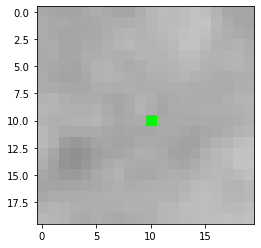

In [39]:
plt.imshow(img_gray[y-10:y+10,x-10:x+10,:])

In [37]:
cv2.imwrite('test.tif', img_gray)

True

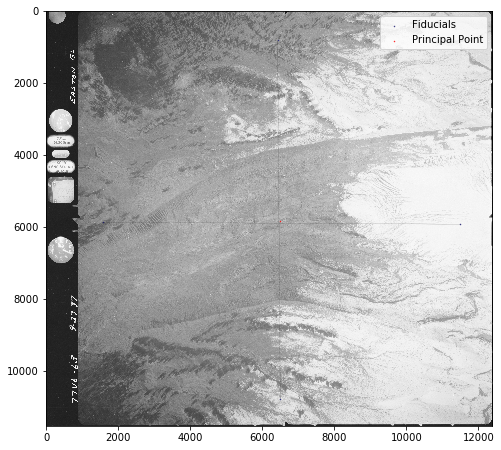

In [24]:
hsfm.plot.plot_principal_point_and_fiducial_locations(img_gray,
                                                fiducials,
                                                principal_point,
                                                'test',
                                                output_directory=None)